In [2]:
import pandas as pd
import numpy as np
import os
import glob
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
# Reading the csv data as dataframes
df1=pd.read_csv(r"D:\\PYTHON\\singapore\\singapore-resale\\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"D:\\PYTHON\\singapore\\singapore-resale\\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"D:\PYTHON\\singapore\\singapore-resale\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"D:\PYTHON\\singapore\\singapore-resale\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"D:\PYTHON\\singapore\\singapore-resale\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")


In [4]:
# Shape of each dataframes
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(168252, 11)


In [5]:
# Concating all dataframes to a single dataframe
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [6]:
# Shape of the final dataframe
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
914450,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
914451,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
914452,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
914453,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months


In [7]:
# Checking the head of the dataframe    
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [8]:
# Checking the tail of the dataframe
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
914450,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
914451,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
914452,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,62 years 10 months
914453,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months
914454,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0,63 years 02 months


In [9]:
# Checking the shape of the dataframe
df.shape

(914455, 11)

In [10]:
# Checking the Information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914455 entries, 0 to 914454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914455 non-null  object 
 1   town                 914455 non-null  object 
 2   flat_type            914455 non-null  object 
 3   block                914455 non-null  object 
 4   street_name          914455 non-null  object 
 5   storey_range         914455 non-null  object 
 6   floor_area_sqm       914455 non-null  float64
 7   flat_model           914455 non-null  object 
 8   lease_commence_date  914455 non-null  int64  
 9   resale_price         914455 non-null  float64
 10  remaining_lease      205405 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ MB


In [11]:
# Checking the number of labels in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  408 labels
town :  27 labels
flat_type :  8 labels
block :  2696 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  210 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9342 labels
remaining_lease :  719 labels


In [12]:
# Checking for missing values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [13]:
# droping remaining_lease
df = df.drop(columns='remaining_lease')

In [14]:
# After droping the remaining_lease column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

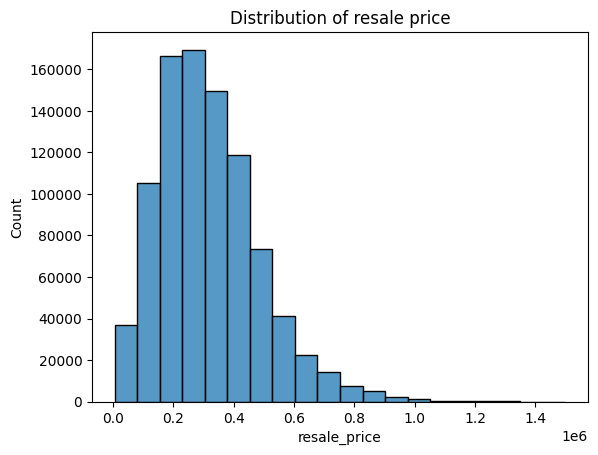

In [16]:
# Visualize the distribution of the resale price column
sns.histplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
# plt.grid()
plt.show()

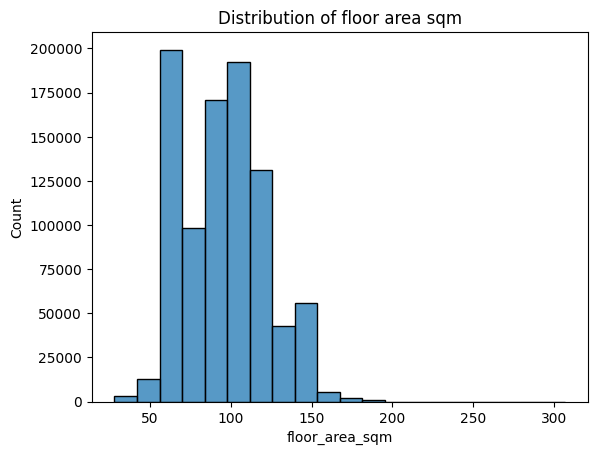

In [17]:
# Visualize the distribution of the floor area sqm column
sns.histplot(df['floor_area_sqm'], bins = 20)
plt.title('Distribution of floor area sqm')
# plt.grid()
plt.show()

In [18]:
df['flat_type'].value_counts()

flat_type
4 ROOM              346891
3 ROOM              292862
5 ROOM              192531
EXECUTIVE            68876
2 ROOM               11457
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       259
Name: count, dtype: int64

<Axes: xlabel='flat_type'>

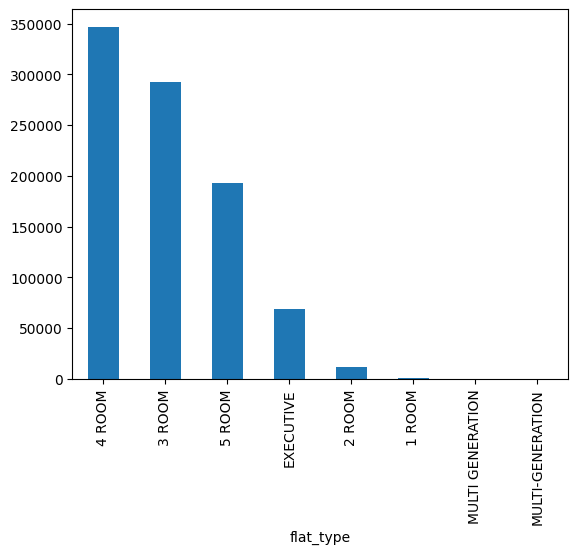

In [19]:
df['flat_type'].value_counts().plot(kind = 'bar')

In [20]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [21]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

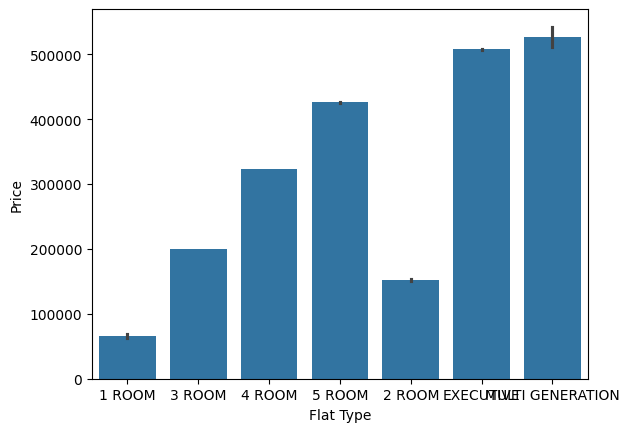

In [22]:
# Visualize the distribution of the flat_type column
sns.barplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

In [23]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

flat_type
4    346891
3    292862
5    192531
6     68876
2     11457
1      1300
7       538
Name: count, dtype: int64

In [24]:
# Visualize the distribution of the flat_type column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [25]:
# Converting the flat_model column to lowercase
df['flat_model'] = df['flat_model'].str.lower()

In [26]:
# Unique lables in flat_model column
df['flat_model'].nunique()

21

In [27]:
# Visualize the distribution of the flat_model column
df['flat_model'].value_counts()

flat_model
model a                   260043
improved                  238832
new generation            187492
simplified                 57105
premium apartment          45521
standard                   42263
apartment                  35094
maisonette                 29342
model a2                    9993
dbss                        3175
model a-maisonette          2056
adjoined flat               1232
terrace                      688
multi generation             538
type s1                      429
type s2                      211
improved-maisonette          125
2-room                       106
premium apartment loft       103
premium maisonette            86
3gen                          21
Name: count, dtype: int64

In [28]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [29]:
df['flat_modelcode'].value_counts()


flat_modelcode
8     260043
5     238832
12    187492
16     57105
13     45521
17     42263
3      35094
7      29342
10      9993
4       3175
9       2056
2       1232
18       688
11       538
19       429
20       211
6        125
0        106
14       103
15        86
1         21
Name: count, dtype: int64

In [30]:
# Town column 
df['town'].nunique()

27

In [31]:
# Visualize the distribution of the town column
df['town'].value_counts()

town
TAMPINES           79075
YISHUN             69197
BEDOK              66034
JURONG WEST        65754
WOODLANDS          64625
ANG MO KIO         51615
HOUGANG            50015
BUKIT BATOK        43627
CHOA CHU KANG      37739
BUKIT MERAH        33878
PASIR RIS          32906
SENGKANG           31560
TOA PAYOH          31189
QUEENSTOWN         28467
GEYLANG            27921
CLEMENTI           27783
BUKIT PANJANG      27310
KALLANG/WHAMPOA    26807
JURONG EAST        24511
SERANGOON          22617
BISHAN             21101
PUNGGOL            19735
SEMBAWANG          13387
MARINE PARADE       7983
CENTRAL AREA        7069
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: count, dtype: int64

In [32]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [33]:
# Encoded value coun
df['town_code'].value_counts()

town_code
23    79075
26    69197
1     66034
13    65754
25    64625
0     51615
11    50015
3     43627
8     37739
4     33878
17    32906
21    31560
24    31189
19    28467
10    27921
9     27783
5     27310
14    26807
12    24511
22    22617
2     21101
18    19735
20    13387
16     7983
7      7069
6      2486
15       64
Name: count, dtype: int64

In [34]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [35]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [36]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [37]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [38]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [39]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [40]:
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [63]:
df

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914450,2023-12,2023,12,YISHUN,26,6,606,YISHUN ST 61,07,09,07 TO 09,142.0,apartment,3,1987,788888.0
914451,2023-12,2023,12,YISHUN,26,6,643,YISHUN ST 61,10,12,10 TO 12,146.0,maisonette,7,1987,838000.0
914452,2023-12,2023,12,YISHUN,26,6,643,YISHUN ST 61,10,12,10 TO 12,142.0,apartment,3,1987,755000.0
914453,2023-12,2023,12,YISHUN,26,6,826,YISHUN ST 81,01,03,01 TO 03,142.0,apartment,3,1988,780000.0


In [65]:
df.to_csv("D:/PYTHON/singapore.csv")

In [61]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [42]:
# Dealing with datatypes
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [43]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']]

In [44]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

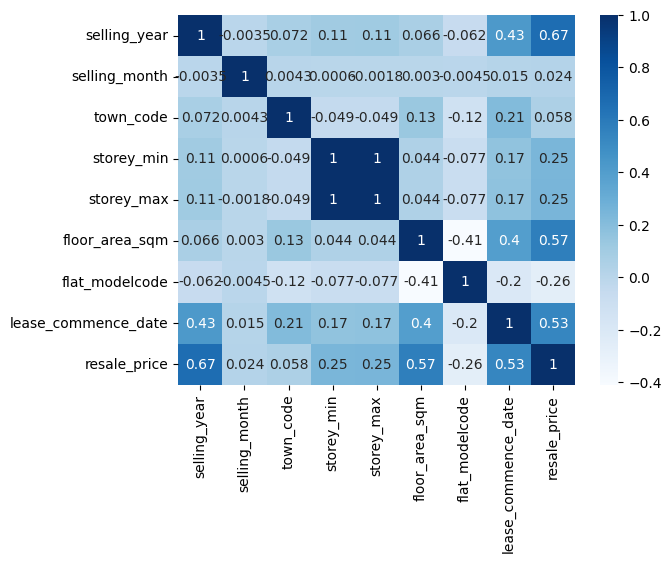

In [45]:
# Correlation matrix
corr_df = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df,  cmap="Blues",annot = True)

Training the model

In [67]:
# create x and y variables   
X = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']]
y = df['resale_price']

In [68]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Linear Regression


In [69]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [70]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

100.0 %


Decision Tree Regressor

In [71]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [72]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

99.99986289870458 %


Random Forest Regressor

In [73]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [74]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

99.99993601025632 %


Pickling the random forest trained knowledge to build streamlit ML model web page

In [75]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr_pkl","wb") as files:
  pickle.dump(rf_reg, files)